# Covariate advection with varying isotropic diffusion 

#### Neumann boundary conditions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
grad_res = np.load('../grad/cov-advection-var-idiffusion-2D-bc1.npz')
ngrad = grad_res['ngrad']
sgrad = grad_res['sgrad']

m = 6
n = 4
fig, ax = plt.subplots(figsize = (45,20),ncols = m, nrows = n)
titles = np.hstack([["\u03BA%d"%i for i in range(1,10)], 
                    ["\u03B3%d"%i for i in range(1,10)],
                    "\u039B", "\u03C3", "\u03BA0", "\u03B30","\u03C4"])
for i in range(m):
    for j in range(n):
        if i + j*m >= sgrad.shape[0]:
            break
        tx = np.linspace(sgrad[i + j*m,:].min(),sgrad[i+j*m,:].max(),100)
        ty = gaussian_kde(sgrad[i + j*m,:])(tx)
        ax[j,i].plot(tx,ty,'b')
        ax[j,i].hist(sgrad[i + j*m,:],density = True, bins = 20, color = 'b', alpha = 0.2)
        ax[j,i].vlines(x=ngrad[i + j*m],ymin = 0,ymax = ty.max(),colors='r',linewidth = 2)
        ax[j,i].set_xlabel(titles[i + j*m],fontsize = 10)
        ax[j,i].set_yticks([])
        ax[j,i].set_xticks(np.linspace(tx.min(),tx.max(),3))
fig.subplots_adjust(wspace = 0.1, hspace = 0.3)

FileNotFoundError: [Errno 2] No such file or directory: '../grad/cov-advection-var-idiffusion-2D-bc1.npz'

### Dirichlet boundary conditions

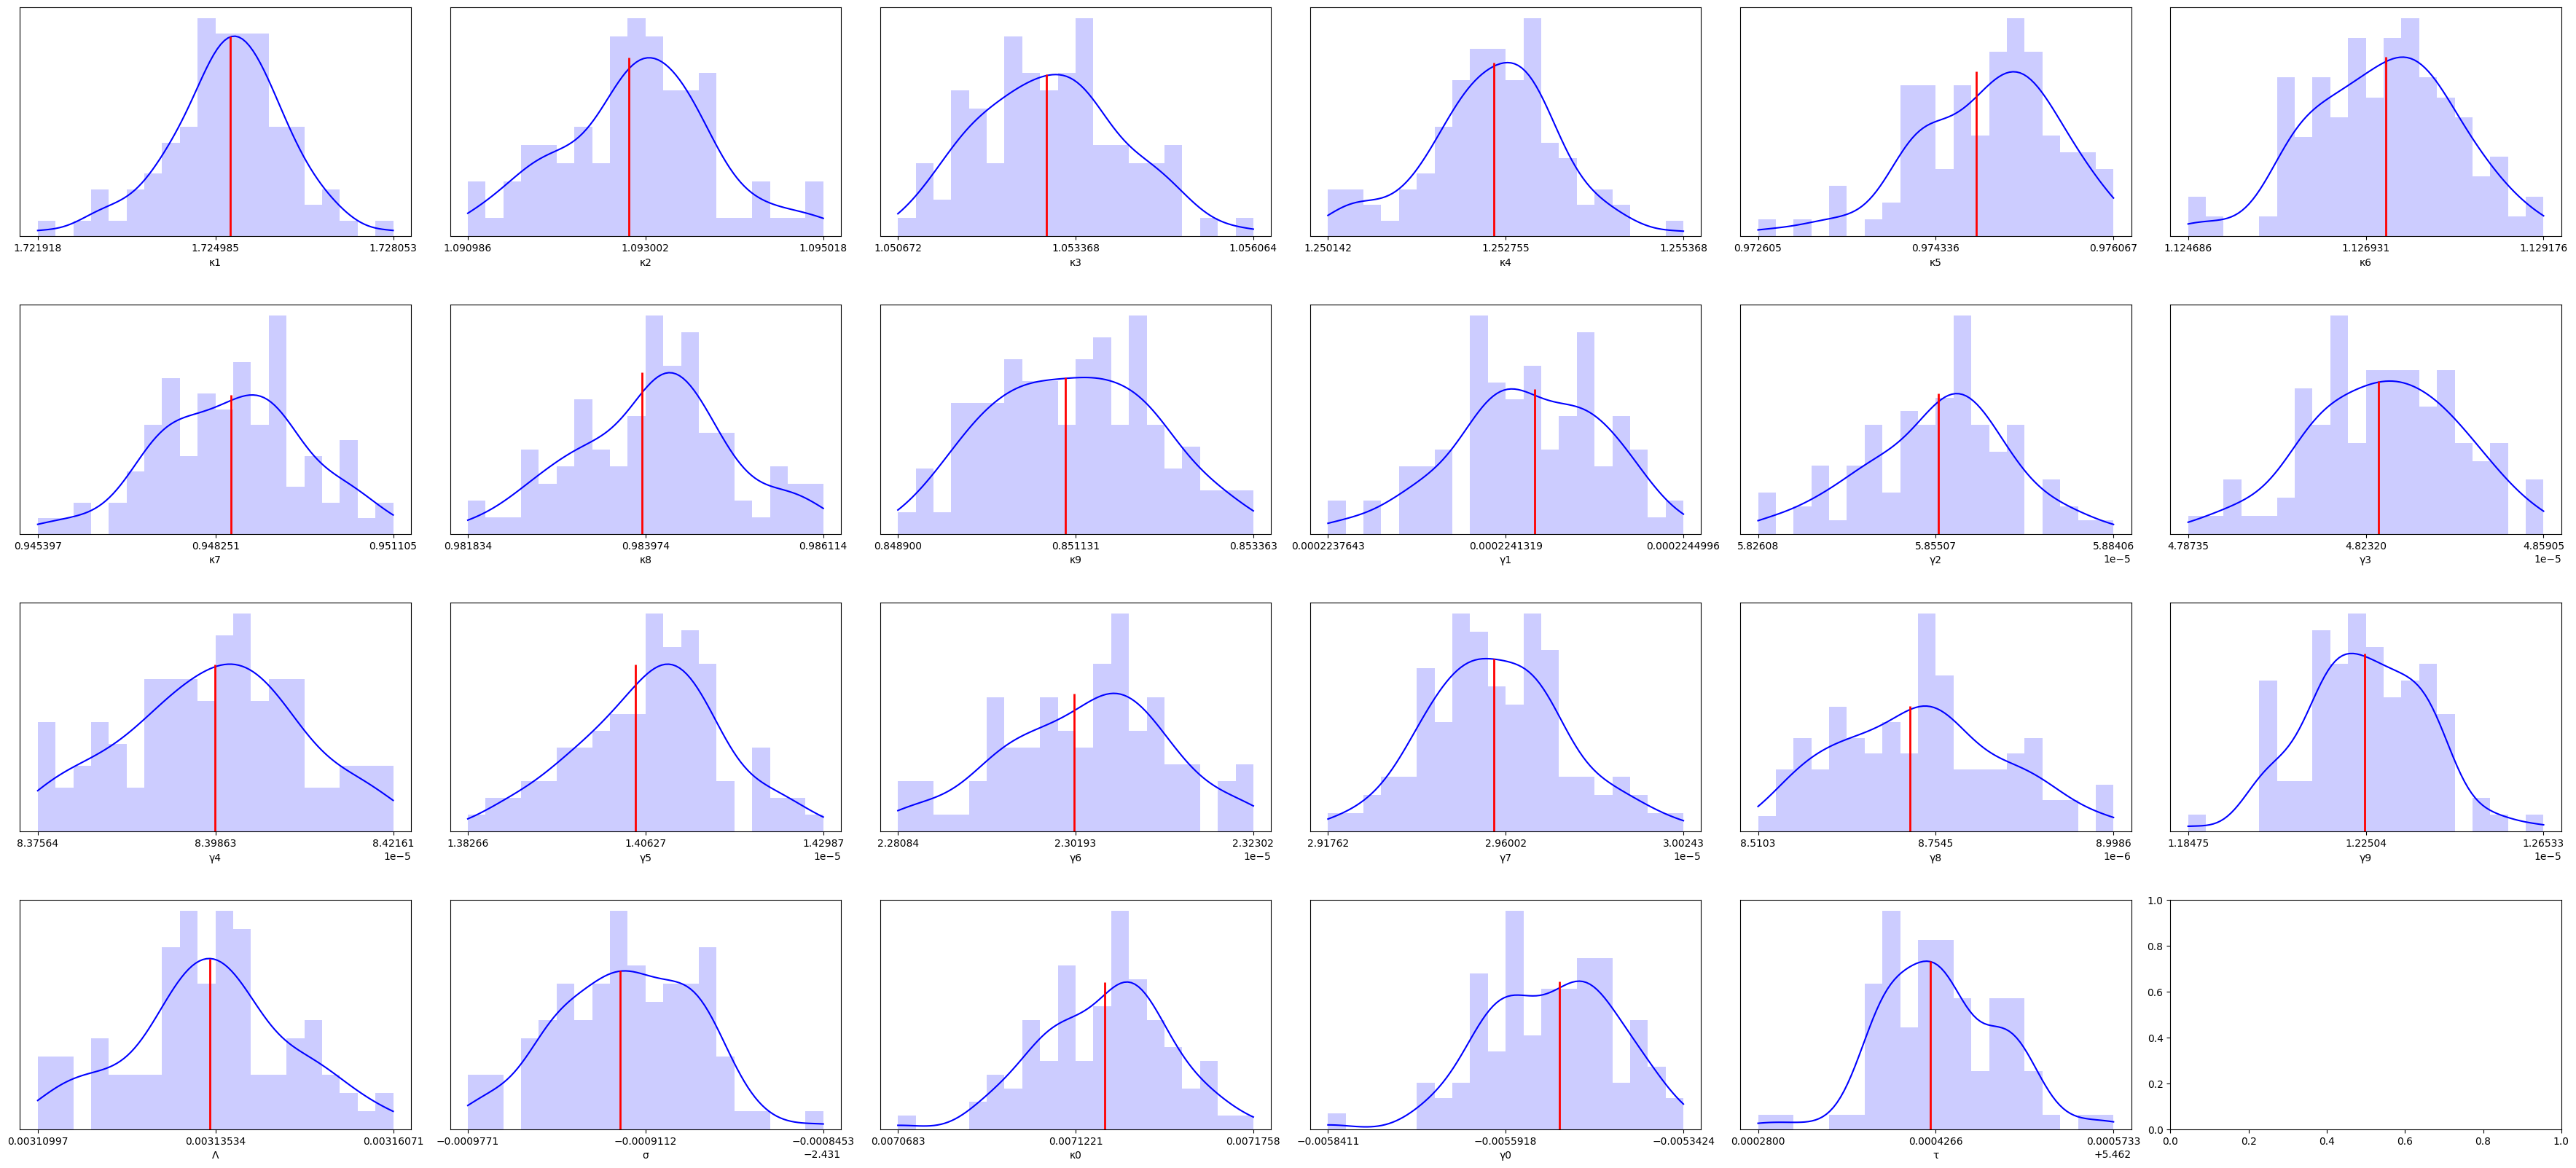

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
grad_res = np.load('../grad/cov-advection-var-idiffusion-2D-bc3.npz')
ngrad = grad_res['ngrad']
sgrad = grad_res['sgrad']

m = 6
n = 4
fig, ax = plt.subplots(figsize = (45,20),ncols = m, nrows = n)
titles = np.hstack([["\u03BA%d"%i for i in range(1,10)], 
                    ["\u03B3%d"%i for i in range(1,10)],
                    "\u039B", "\u03C3","\u03BA0", "\u03B30", "\u03C4"])
for i in range(m):
    for j in range(n):
        if i + j*m >= sgrad.shape[0]:
            break
        tx = np.linspace(sgrad[i + j*m,:].min(),sgrad[i+j*m,:].max(),100)
        ty = gaussian_kde(sgrad[i + j*m,:])(tx)
        ax[j,i].plot(tx,ty,'b')
        ax[j,i].hist(sgrad[i + j*m,:],density = True, bins = 20, color = 'b', alpha = 0.2)
        ax[j,i].vlines(x=ngrad[i + j*m],ymin = 0,ymax = ty.max(),colors='r',linewidth = 2)
        ax[j,i].set_xlabel(titles[i + j*m],fontsize = 10)
        ax[j,i].set_yticks([])
        ax[j,i].set_xticks(np.linspace(tx.min(),tx.max(),3))
fig.subplots_adjust(wspace = 0.1, hspace = 0.3)

#### Visualization

In [ ]:
import spdepy as sp
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gaussian_kde
from tqdm import tqdm    

data = sp.datasets.get_sinmod_training()
bc = 3
spde = 'cov-advection-var-diffusion'
mod0 = sp.model(grid = sp.grid(x=data['x'], y=data['y'], extend = 5),
        spde = 'whittle-matern', parameters = np.load('../fits/whittle_matern_bc%d.npy'%bc),
        ha = False, bc = bc, anisotropic = False)
mod = sp.model(grid = sp.grid(x=data['x'], y=data['y'], t = data['t'],extend = 5),
        spde = spde, ha = False, bc = bc, anisotropic = False, Q0 = mod0.mod.Q,
        parameters = np.load('../fits/%s_bc%d.npy'%(spde,bc)))
ww = mod.grid.assimilate_adv(data['we'],data['wn'])
mod.mod.setPars(mod.mod.initFit(data['mut'],ww = ww))
mod.mod.setQ()

#### Prediction on test set